In [1]:
import pandas as pd
import numpy as np

In [62]:
data_train = pd.read_csv(r'D:\Machine Learning\Yomal\KDDTrain+.txt\KDDTrain+.txt', sep = ',', encoding = 'utf-8', header = None)

In [63]:
data_test = pd.read_csv(r'D:\Machine Learning\Yomal\KDDTest+.txt\KDDTest+.txt', sep = ',', encoding = 'utf-8', header = None)

In [64]:
import matplotlib.pyplot as plt

## Identifying and Handling Imputations

In [65]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21  21      12

In [66]:
data_train.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

In [67]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22544 non-null  int64  
 1   1       22544 non-null  object 
 2   2       22544 non-null  object 
 3   3       22544 non-null  object 
 4   4       22544 non-null  int64  
 5   5       22544 non-null  int64  
 6   6       22544 non-null  int64  
 7   7       22544 non-null  int64  
 8   8       22544 non-null  int64  
 9   9       22544 non-null  int64  
 10  10      22544 non-null  int64  
 11  11      22544 non-null  int64  
 12  12      22544 non-null  int64  
 13  13      22544 non-null  int64  
 14  14      22544 non-null  int64  
 15  15      22544 non-null  int64  
 16  16      22544 non-null  int64  
 17  17      22544 non-null  int64  
 18  18      22544 non-null  int64  
 19  19      22544 non-null  int64  
 20  20      22544 non-null  int64  
 21  21      22544 non-null  int64  
 22

In [68]:
data_test.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

## Identifying and handling outliers

In [69]:
numerical_train = data_train.select_dtypes(['int64', 'float64'])

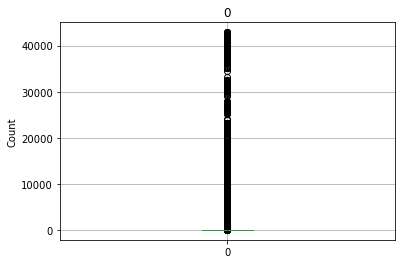

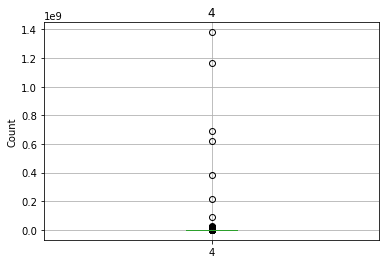

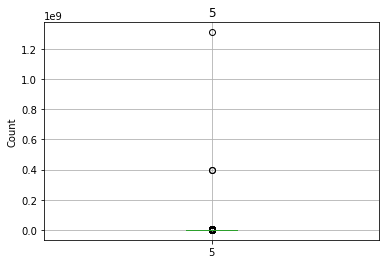

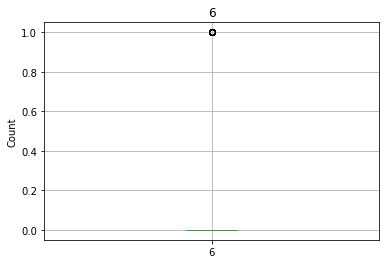

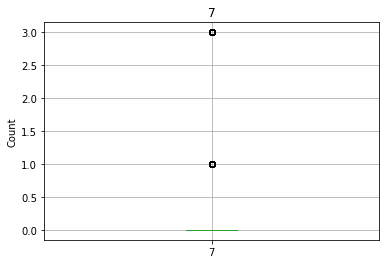

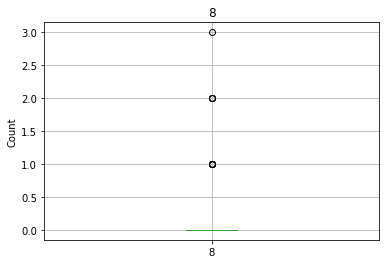

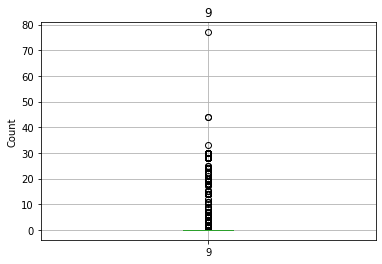

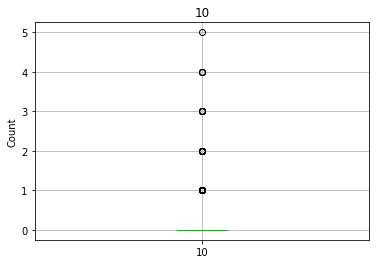

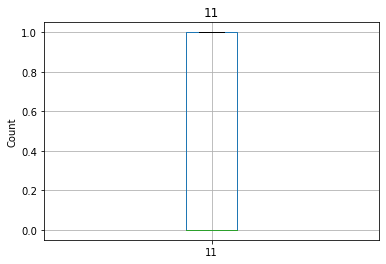

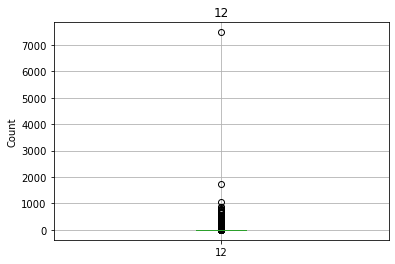

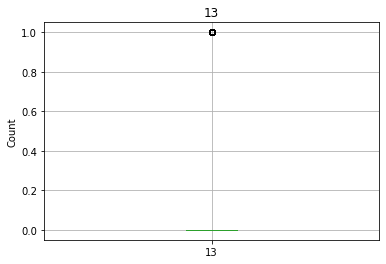

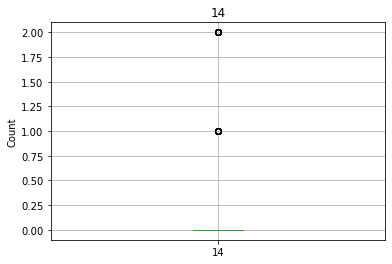

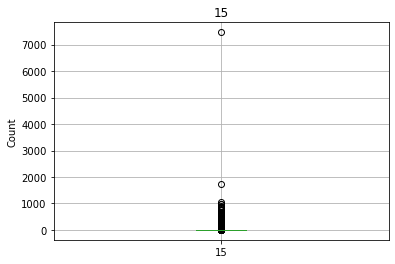

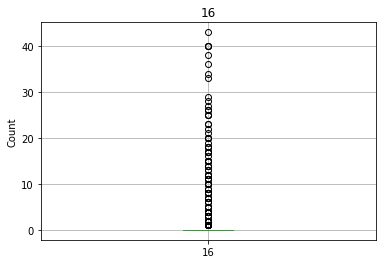

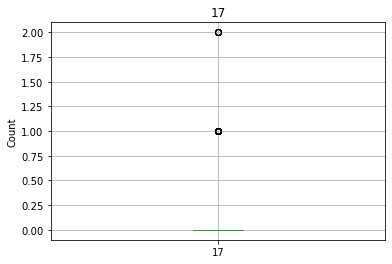

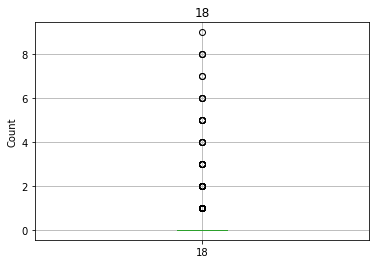

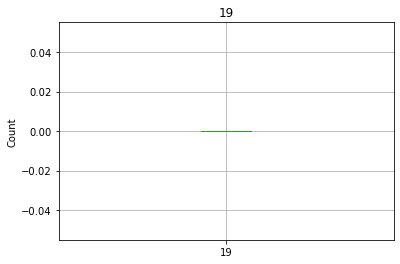

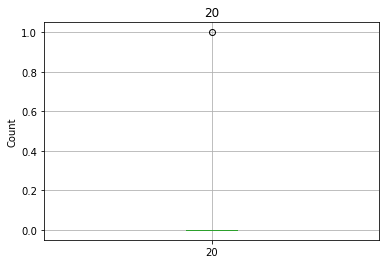

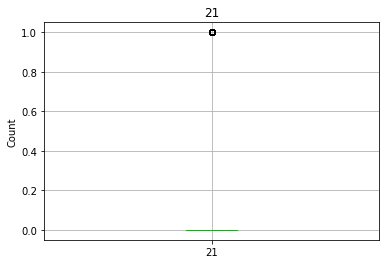

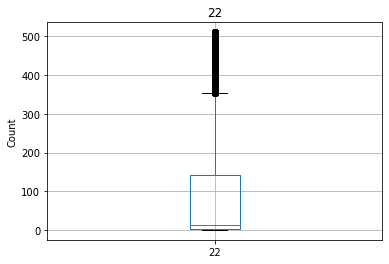

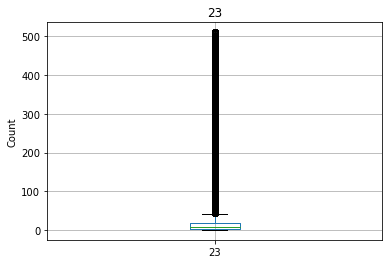

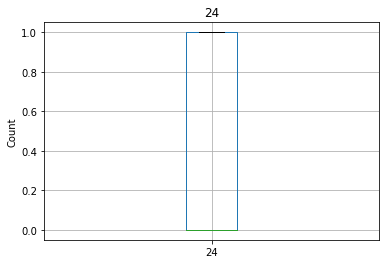

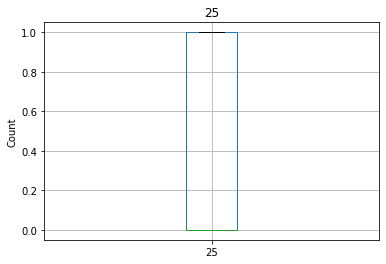

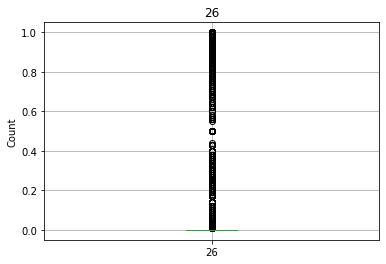

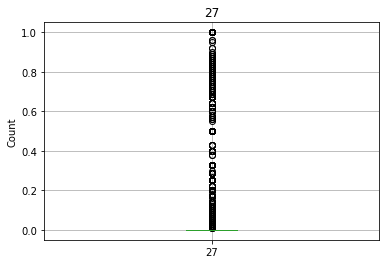

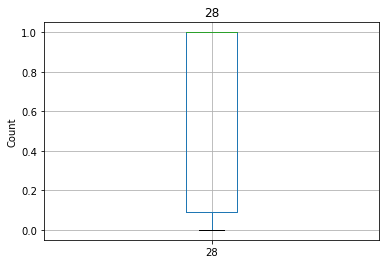

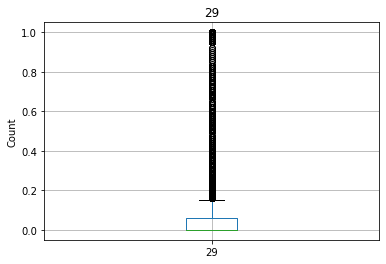

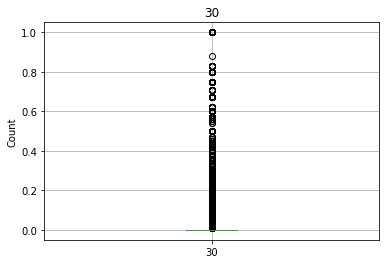

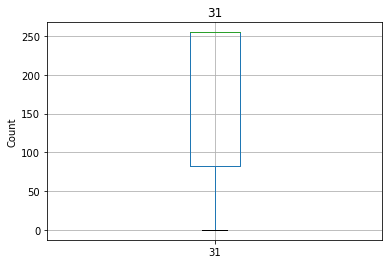

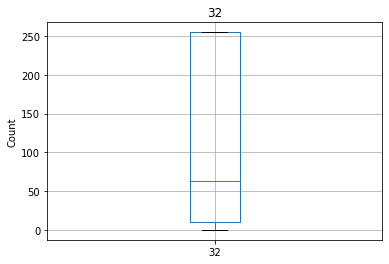

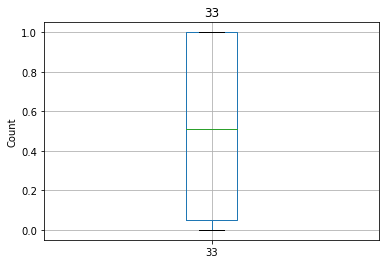

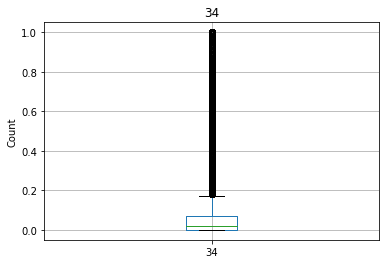

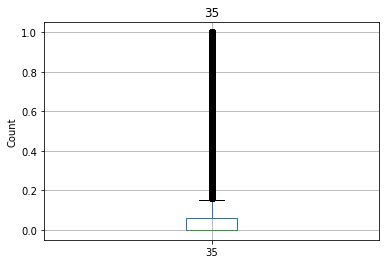

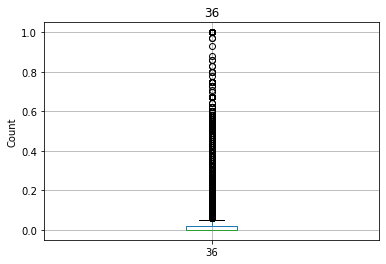

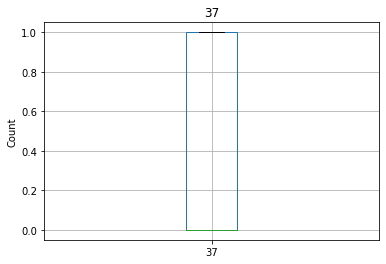

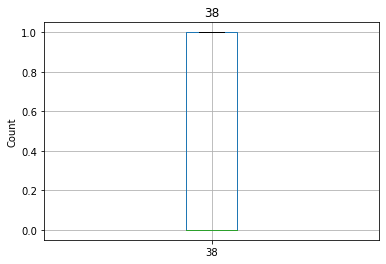

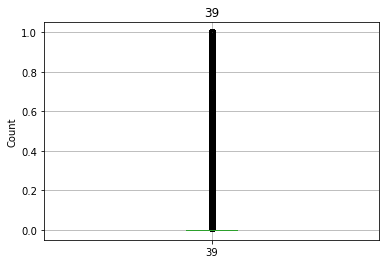

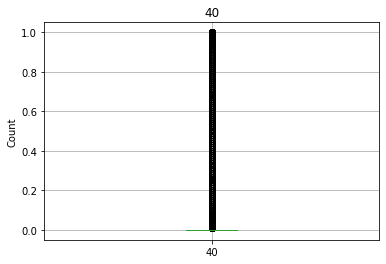

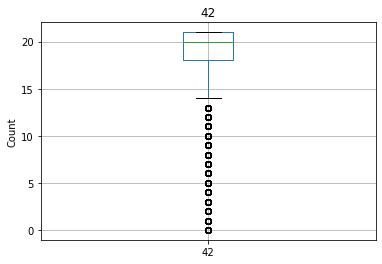

In [70]:
for col in numerical_train.columns:
    dataset = data_train.copy()
    dataset.boxplot(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

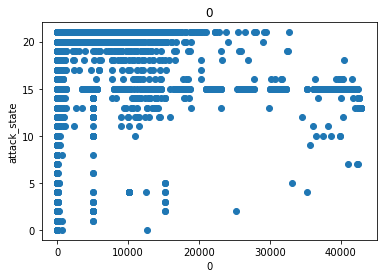

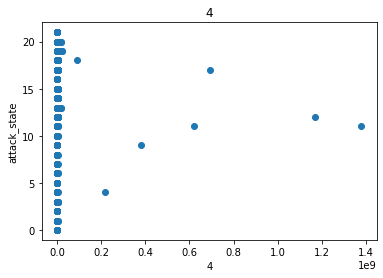

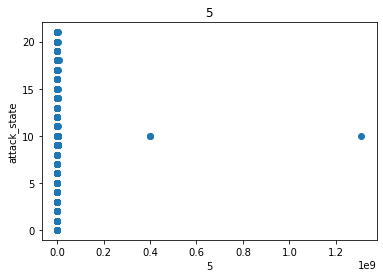

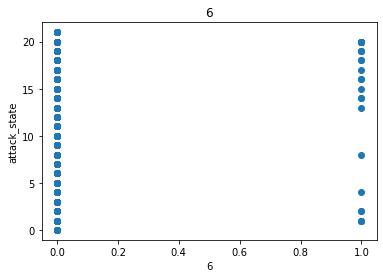

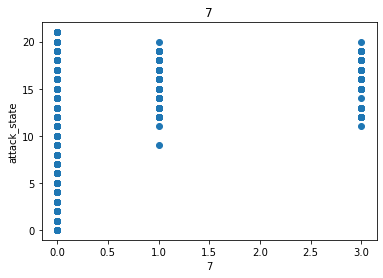

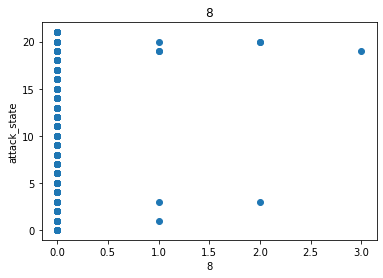

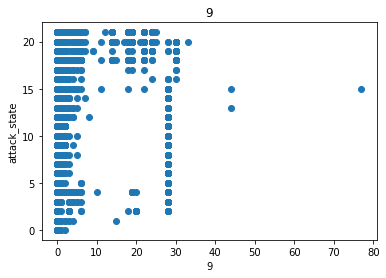

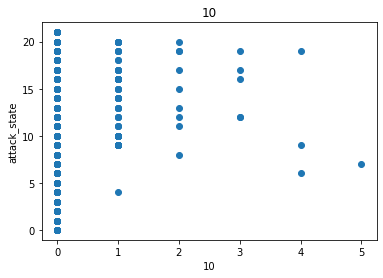

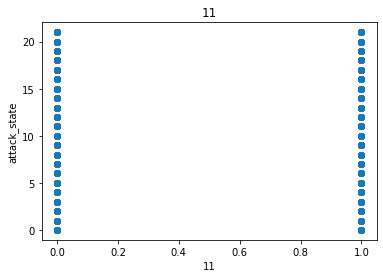

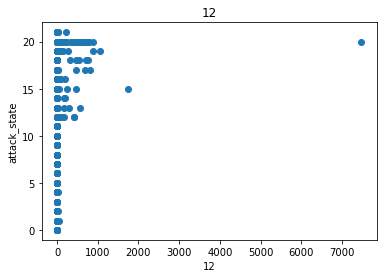

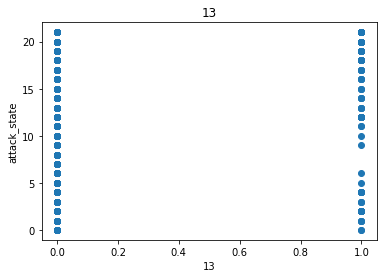

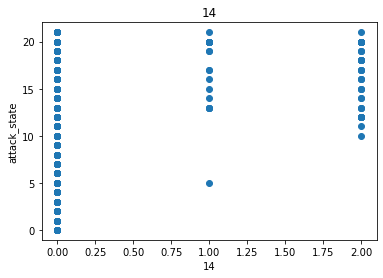

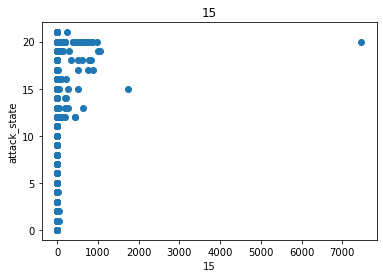

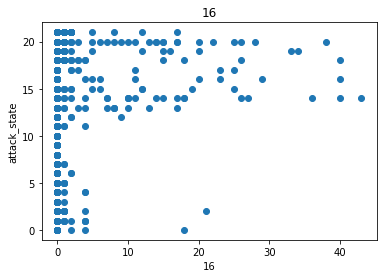

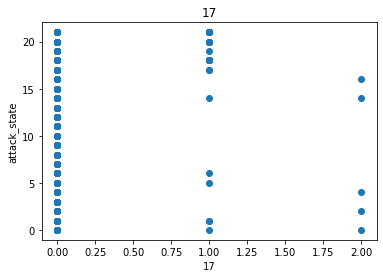

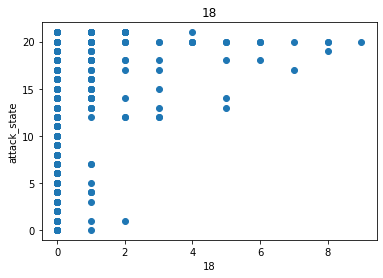

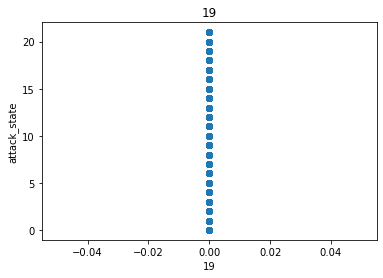

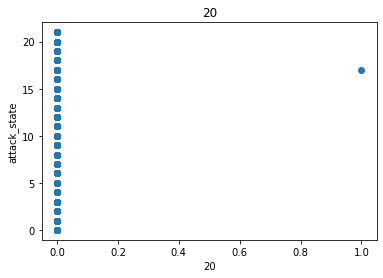

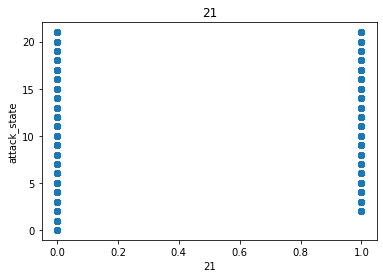

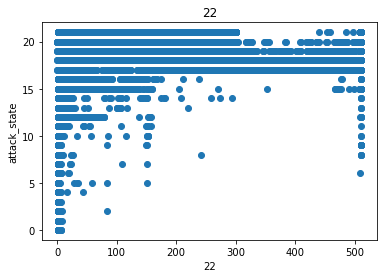

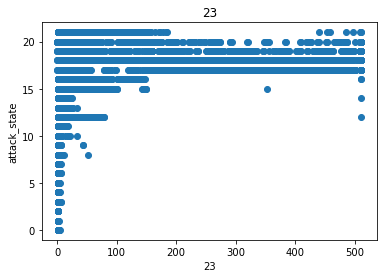

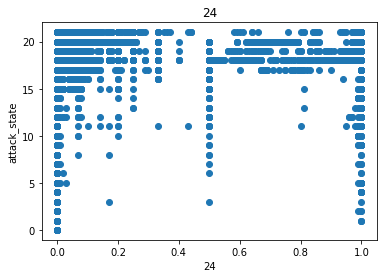

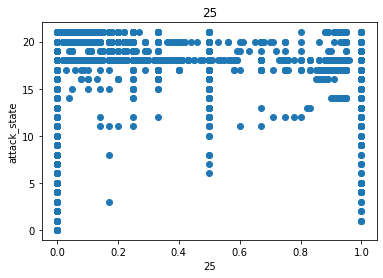

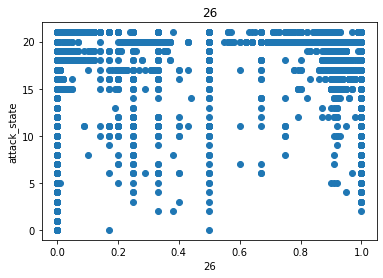

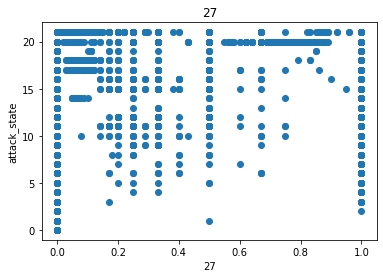

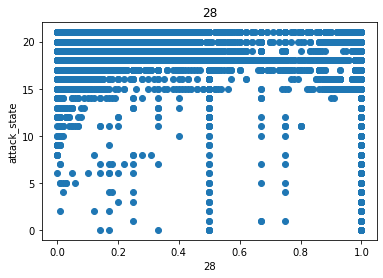

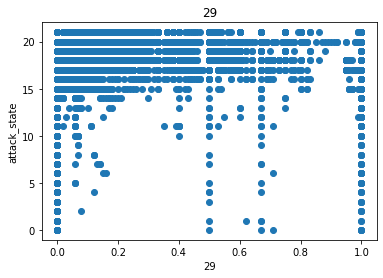

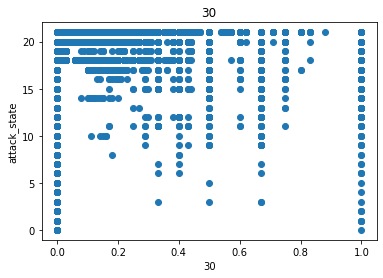

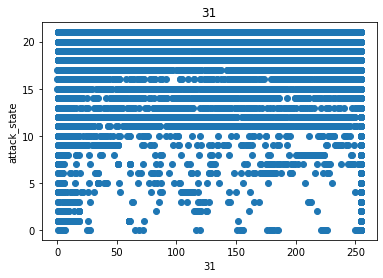

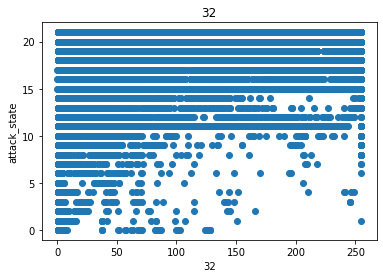

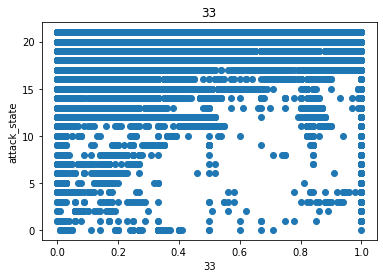

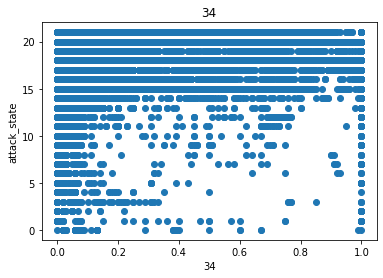

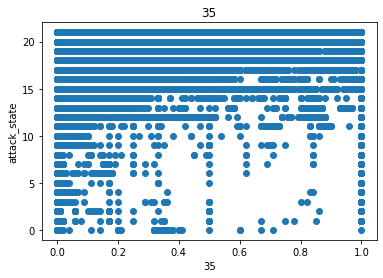

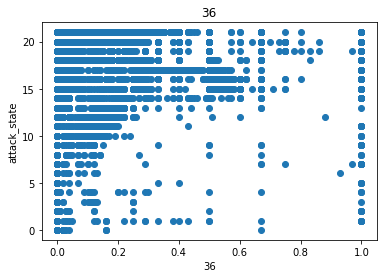

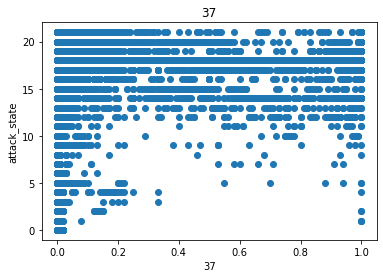

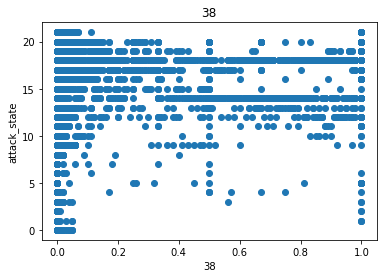

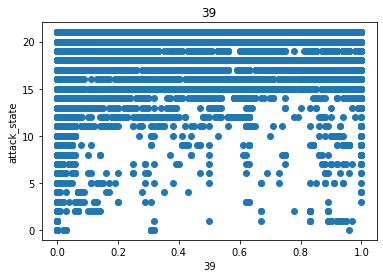

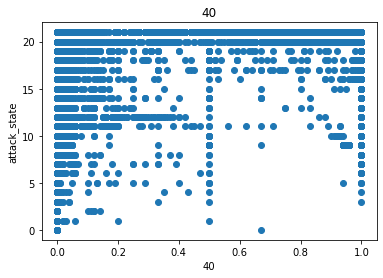

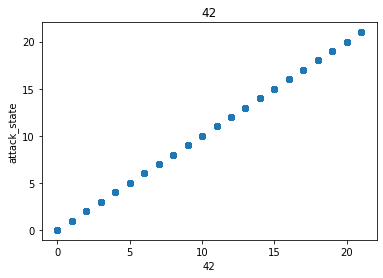

In [71]:
for col in numerical_train.columns:
    dataset = data_train.copy()
    plt.scatter(dataset[col], dataset[42])
    plt.xlabel(col)
    plt.ylabel('attack_state')
    plt.title(col)
    plt.show()

## Feature Engineering

In [72]:
categorical_train = data_train.select_dtypes('object')

In [73]:
categorical_train

,1,2,3,41
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [74]:
for col in categorical_train.columns:
    print(categorical_train[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [75]:
categorical_test = data_test.select_dtypes('object')

In [76]:
for col in categorical_test.columns:
    print(categorical_test[col].unique())

['tcp' 'icmp' 'udp']
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'


In [77]:
data_train.shape

(125973, 43)

In [78]:
data_test.shape

(22544, 43)

In [79]:
dataset = pd.concat([data_train, data_test], axis = 0)

In [80]:
dataset = pd.get_dummies(dataset,columns=[1,2,3],prefix="",prefix_sep="")

In [81]:
dataset

,0,4,5,6,7,8,9,10,11,12,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()

In [84]:
dataset[41] = encoder.fit_transform(dataset[42])

In [85]:
dataset

,0,4,5,6,7,8,9,10,11,12,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
data_train = dataset.iloc[:125973, :]
data_test = dataset.iloc[125973:, :]

In [87]:
data_train

,0,4,5,6,7,8,9,10,11,12,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [88]:
data_test

,0,4,5,6,7,8,9,10,11,12,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22540,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
22542,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Columns: 124 entries, 0 to SH
dtypes: float64(15), int64(25), uint8(84)
memory usage: 58.4 MB


In [139]:
dataset[42]

0        20
1        15
2        19
3        21
4        21
         ..
22539    21
22540    21
22541    15
22542    21
22543    14
Name: 42, Length: 148517, dtype: int64

## Scaling the data

In [141]:
x_train = data_train.loc[:, data_train.columns != 42]
y_train = data_train[42]

x_test = data_test.loc[:, data_test.columns != 42]
y_test = data_test[42]

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scaler = StandardScaler()

In [144]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [145]:
x_train.shape

(125973, 123)

In [146]:
x_train

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.01972622,
        -1.21190076, -0.04643159],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.01972622,
        -1.21190076, -0.04643159],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159]])

In [147]:
y_train[:10]

0    20
1    15
2    19
3    21
4    21
5    21
6    21
7    21
8    21
9    21
Name: 42, dtype: int64

## ANN

In [148]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier = Sequential()

classifier.add(keras.Input(shape = 123))

classifier.add(Dense(units = 60, kernel_initializer = "uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 60, kernel_initializer = "uniform", activation = "relu"))

classifier.add(Dense(units = 60, kernel_initializer = "uniform", activation = "relu"))

classifier.add(Dense(units = 1, kernel_initializer = "uniform"))

classifier.compile(optimizer = 'Adamax', loss = keras.losses.MeanSquaredError())

In [149]:
classifier.fit(x_train, y_train, batch_size = 50, epochs = 10)

Epoch 1/10
2520/2520 [==============================] - 6s 2ms/step - loss: 13.1342
Epoch 2/10
2520/2520 [==============================] - 6s 2ms/step - loss: 0.9081
Epoch 3/10
2520/2520 [==============================] - 7s 3ms/step - loss: 0.6236
Epoch 4/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.5794
Epoch 5/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.5607
Epoch 6/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.5399
Epoch 7/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.5047
Epoch 8/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.4431
Epoch 9/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.3442
Epoch 10/10
2520/2520 [==============================] - 9s 3ms/step - loss: 0.2405


In [150]:
y_pred = classifier.predict(x_test)

705/705 [==============================] - 2s 2ms/step


In [151]:
y_pred

array([[21.110891 ],
       [21.09011  ],
       [21.098885 ],
       ...,
       [15.1819515],
       [21.075039 ],
       [14.807496 ]], dtype=float32)

In [152]:
y_test

0        21
1        21
2        21
3        15
4        11
         ..
22539    21
22540    21
22541    15
22542    21
22543    14
Name: 42, Length: 22544, dtype: int64

In [154]:
y_t = pd.DataFrame(y_test)
y_p = pd.DataFrame(y_pred)

In [157]:
y = pd.concat([y_t, y_p], axis = 1)

In [167]:
y = y.rename(columns={42:'y_test', 0:'y_pred'})

In [174]:
from scipy import stats
from scipy.stats import norm
import seaborn as sns

F:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 18.02 and sigma = 4.27



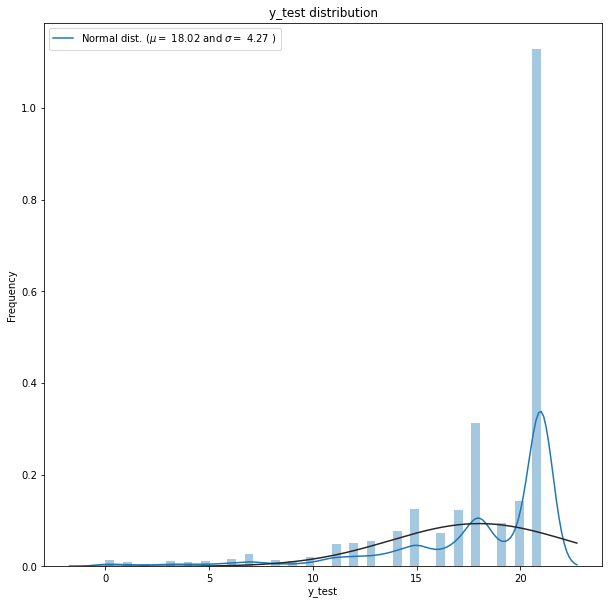

In [181]:
plt.figure(figsize=(10,10))
sns.distplot(y['y_test'] , fit=norm);

(mu, sigma) = norm.fit(y['y_test'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y_test distribution')
plt.show()

F:\Anaconda Navigator\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 18.16 and sigma = 3.94



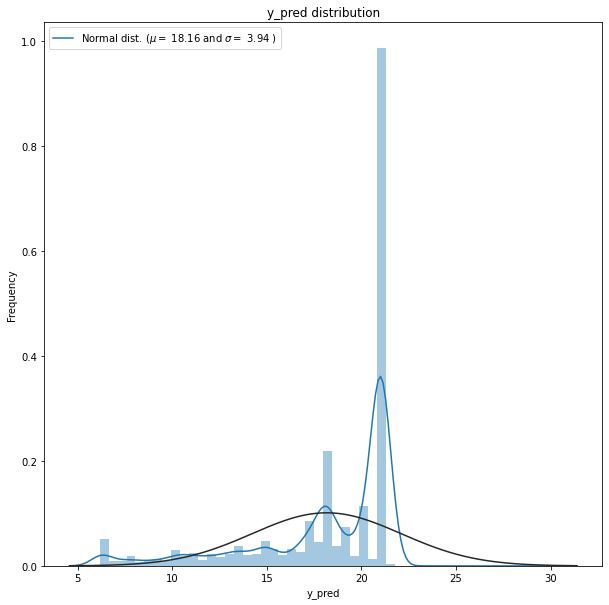

In [182]:
plt.figure(figsize=(10,10))
sns.distplot(y['y_pred'] , fit=norm);

(mu, sigma) = norm.fit(y['y_pred'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y_pred distribution')
plt.show()

In [183]:
y.to_csv('y.csv', index=False)